In [1]:
import os
import pymysql
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
host = os.getenv('host')
user = os.getenv('user')
password = os.getenv('password')
database = os.getenv('database')

In [3]:
# Establish a database connection
conn = pymysql.connect(
    host=host,
    user=user,
    password=password,
    database=database
)
cursor = conn.cursor()

In [4]:
# Example query to fetch data
query = "SELECT * FROM movies LIMIT 10;"
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy\r')
(2, 'Jumanji (1995)', 'Adventure|Children|Fantasy\r')
(3, 'Grumpier Old Men (1995)', 'Comedy|Romance\r')
(4, 'Waiting to Exhale (1995)', 'Comedy|Drama|Romance\r')
(5, 'Father of the Bride Part II (1995)', 'Comedy\r')
(6, 'Heat (1995)', 'Action|Crime|Thriller\r')
(7, 'Sabrina (1995)', 'Comedy|Romance\r')
(8, 'Tom and Huck (1995)', 'Adventure|Children\r')
(9, 'Sudden Death (1995)', 'Action\r')
(10, 'GoldenEye (1995)', 'Action|Adventure|Thriller\r')


In [5]:
movies_with_links_df = pd.read_sql("""
SELECT
  m.movieId,
  m.title,
  m.genres,
  l.imdbId,
  l.tmdbId
FROM movies m
LEFT JOIN links l
  ON m.movieId = l.movieId;
""", conn)

C:\Users\karthick.S\AppData\Local\Temp\ipykernel_3420\4255613554.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies_with_links_df = pd.read_sql("""


In [6]:
movies_with_links_df.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy\r,0114709,862
1,2,Jumanji (1995),Adventure|Children|Fantasy\r,0113497,8844
2,3,Grumpier Old Men (1995),Comedy|Romance\r,0113228,15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance\r,0114885,31357
4,5,Father of the Bride Part II (1995),Comedy\r,0113041,11862


Data Transformation

In [7]:
movies_with_links_df['release_year'] = movies_with_links_df['title'].str.extract(r'\((\d{4})\)')
movies_with_links_df['title'] = movies_with_links_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movies_with_links_df['genres'] = movies_with_links_df['genres'].str.replace('\r', '').str.split('|')

In [8]:
movies_with_links_df.head(10)

,movieId,title,genres,imdbId,tmdbId,release_year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0114709,862,1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",0113497,8844,1995
2,3,Grumpier Old Men,"[Comedy, Romance]",0113228,15602,1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",0114885,31357,1995
4,5,Father of the Bride Part II,[Comedy],0113041,11862,1995
5,6,Heat,"[Action, Crime, Thriller]",0113277,949,1995
6,7,Sabrina,"[Comedy, Romance]",0114319,11860,1995
7,8,Tom and Huck,"[Adventure, Children]",0112302,45325,1995
8,9,Sudden Death,[Action],0114576,9091,1995
9,10,GoldenEye,"[Action, Adventure, Thriller]",0113189,710,1995


In [9]:
movies_with_links_df['links'] = movies_with_links_df.apply(
    lambda row: {
        
        "imdbId": row['imdbId'],
        "tmdbId": row['tmdbId']
    },
    axis=1
)

movies_with_links_df.head()

,movieId,title,genres,imdbId,tmdbId,release_year,links
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0114709,862,1995,"{'imdbId': '0114709', 'tmdbId': 862}"
1,2,Jumanji,"[Adventure, Children, Fantasy]",0113497,8844,1995,"{'imdbId': '0113497', 'tmdbId': 8844}"
2,3,Grumpier Old Men,"[Comedy, Romance]",0113228,15602,1995,"{'imdbId': '0113228', 'tmdbId': 15602}"
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",0114885,31357,1995,"{'imdbId': '0114885', 'tmdbId': 31357}"
4,5,Father of the Bride Part II,[Comedy],0113041,11862,1995,"{'imdbId': '0113041', 'tmdbId': 11862}"


In [10]:
movies_with_links_df=movies_with_links_df.drop(columns=['imdbId', 'tmdbId'])

In [11]:
movies_with_links_df.head()

,movieId,title,genres,release_year,links
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"{'imdbId': '0114709', 'tmdbId': 862}"
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,"{'imdbId': '0113497', 'tmdbId': 8844}"
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,"{'imdbId': '0113228', 'tmdbId': 15602}"
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,"{'imdbId': '0114885', 'tmdbId': 31357}"
4,5,Father of the Bride Part II,[Comedy],1995,"{'imdbId': '0113041', 'tmdbId': 11862}"


In [12]:
ratings_df = pd.read_sql("SELECT * FROM ratings;", conn)

C:\Users\karthick.S\AppData\Local\Temp\ipykernel_3420\103351753.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ratings_df = pd.read_sql("SELECT * FROM ratings;", conn)


In [13]:
ratings_df.head()

,userId,movieId,rating,rating_time
0,1,1,4.0,2000-07-31 00:15:03
1,1,3,4.0,2000-07-30 23:50:47
2,1,6,4.0,2000-07-31 00:07:04
3,1,47,5.0,2000-07-31 00:33:35
4,1,50,5.0,2000-07-31 00:18:51


In [14]:
# Group ratings by user
from collections import defaultdict
ratings_by_user = defaultdict(list)
for r in ratings_df.to_dict('records'):
    ratings_by_user[r['userId']].append(r)

In [15]:
rating_stats = (
    ratings_df
    .groupby('movieId')['rating']
    .agg(['mean', 'count'])
    .reset_index()
)

In [16]:
movies_df=movies_with_links_df.merge(
    rating_stats,
    on='movieId',
    how='left'
)

In [17]:
movies_df.rename(columns={'mean': 'averageRating', 'count': 'ratingCount'}, inplace=True)

In [18]:
movies_df.head()

,movieId,title,genres,release_year,links,averageRating,ratingCount
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"{'imdbId': '0114709', 'tmdbId': 862}",3.920930,215.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,"{'imdbId': '0113497', 'tmdbId': 8844}",3.431818,110.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,"{'imdbId': '0113228', 'tmdbId': 15602}",3.259615,52.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,"{'imdbId': '0114885', 'tmdbId': 31357}",2.357143,7.0
4,5,Father of the Bride Part II,[Comedy],1995,"{'imdbId': '0113041', 'tmdbId': 11862}",3.071429,49.0


In [19]:
tags_df = pd.read_sql("SELECT * FROM movie_tags;", conn)
tags_df.head()

C:\Users\karthick.S\AppData\Local\Temp\ipykernel_3420\1458648144.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tags_df = pd.read_sql("SELECT * FROM movie_tags;", conn)


,userId,movieId,tag,tag_time
0,2,60756,funny,2015-10-25 00:59:54
1,2,60756,Highly quotable,2015-10-25 00:59:56
2,2,60756,will ferrell,2015-10-25 00:59:52
3,2,89774,Boxing story,2015-10-25 01:03:27
4,2,89774,MMA,2015-10-25 01:03:20


In [20]:
tags_df['tag'] = tags_df['tag'].str.lower()

In [21]:
tags_by_user = defaultdict(list)
for t in tags_df.to_dict('records'):
    tags_by_user[t['userId']].append(t)

In [22]:
tag_stats = (
    tags_df
    .groupby(['movieId', 'tag'])
    .size()
    .reset_index(name='tagCount')
)

In [23]:
tags_grouped = (
    tag_stats
    .groupby('movieId')
    .apply(lambda x: x[['tag', 'tagCount']].to_dict(orient='records'))
    .reset_index(name='tags')
)

C:\Users\karthick.S\AppData\Local\Temp\ipykernel_3420\3645464448.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['tag', 'tagCount']].to_dict(orient='records'))


In [24]:
print(tags_grouped.head())

   movieId                                               tags
0        1  [{'tag': 'fun', 'tagCount': 1}, {'tag': 'pixar...
1        2  [{'tag': 'fantasy', 'tagCount': 1}, {'tag': 'g...
2        3  [{'tag': 'moldy', 'tagCount': 1}, {'tag': 'old...
3        5  [{'tag': 'pregnancy', 'tagCount': 1}, {'tag': ...
4        7                 [{'tag': 'remake', 'tagCount': 1}]


In [25]:
movies_df = movies_df.merge(
    tags_grouped,
    on='movieId',
    how='left'
)

In [26]:
movies_df.head()

,movieId,title,genres,release_year,links,averageRating,ratingCount,tags
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"{'imdbId': '0114709', 'tmdbId': 862}",3.920930,215.0,"[{'tag': 'fun', 'tagCount': 1}, {'tag': 'pixar..."
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,"{'imdbId': '0113497', 'tmdbId': 8844}",3.431818,110.0,"[{'tag': 'fantasy', 'tagCount': 1}, {'tag': 'g..."
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,"{'imdbId': '0113228', 'tmdbId': 15602}",3.259615,52.0,"[{'tag': 'moldy', 'tagCount': 1}, {'tag': 'old..."
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,"{'imdbId': '0114885', 'tmdbId': 31357}",2.357143,7.0,NaN
4,5,Father of the Bride Part II,[Comedy],1995,"{'imdbId': '0113041', 'tmdbId': 11862}",3.071429,49.0,"[{'tag': 'pregnancy', 'tagCount': 1}, {'tag': ..."


In [27]:
#compute per-user stats
users_list = []

for user_id in set(list(ratings_by_user.keys()) + list(tags_by_user.keys())):
    user_ratings = ratings_by_user.get(user_id, [])
    user_tags = tags_by_user.get(user_id, [])
    
    # Stats
    total_ratings = len(user_ratings)
    avg_rating = round(sum(r['rating'] for r in user_ratings) / total_ratings, 2) if total_ratings > 0 else 0
    total_tags = len(user_tags)
    
    # Recent ratings (sorted by timestamp, descending)
    recent_ratings = sorted(user_ratings, key=lambda x: x['rating_time'], reverse=True)[:10]
    recent_ratings_docs = [{'movieId': r['movieId'], 'rating': r['rating'], 'rating_time': r['rating_time']} for r in recent_ratings]
    
    # Recent tags (sorted by timestamp, descending)
    recent_tags = sorted(user_tags, key=lambda x: x['tag_time'], reverse=True)[:10]
    recent_tags_docs = [{'movieId': t['movieId'], 'tag': t['tag'], 'timestamp': t['tag_time']} for t in recent_tags]

    # Build user document
    user_doc = {
        'userId': user_id,
        'stats': {
            'totalRatings': total_ratings,
            'averageRating': avg_rating,
            'totalTags': total_tags
        },
        'recentRatings': recent_ratings_docs,
        'recentTags': recent_tags_docs
    }
    
    users_list.append(user_doc)


In [28]:
sql_moviecount = movies_df.shape[0]
print(f"Total movies to migrate: {sql_moviecount}")

Total movies to migrate: 9742


In [29]:
sql_ratingscount = ratings_df.shape[0]
print(f"Total ratings to migrate: {sql_ratingscount}")

Total ratings to migrate: 100836


In [30]:
sql_usercount = len(users_list)
print(f"Total users to migrate: {sql_usercount}")

Total users to migrate: 610


In [31]:
conn.close()

Migration to MongoDB

In [32]:
from pymongo import MongoClient
mongo_client = os.getenv('MONGO_URI')
client = MongoClient(mongo_client)

In [33]:
client.admin.command("ping")
print("MongoDB is responding")


MongoDB is responding


In [34]:
print(client.list_database_names())


['Music', 'blog', 'sample_mflix', 'store', 'test', 'admin', 'local']


To check the conncetion

In [35]:
db = client["Music"]
collection = db["Songs"]

In [36]:
doc = collection.find_one()
print(doc)

{'_id': ObjectId('67b729e46db301832bf3fe2c'), 'track_id': '00chLpzhgVjxs1zKC9UScL', 'track_name': 'Poison', 'track_artist': 'Bell Biv DeVoe', 'lyrics': 'NA Yeah, Spyderman and Freeze in full effect Uh-huh You ready, Ron? I\'m ready You ready, Biv? I\'m ready, Slick, are you? Oh, yeah, break it down NA Girl, I, must (warn you) I sense something strange in my mind Situation is (serious) Let\'s cure it cause we\'re running out of time It\'s oh, so (beautiful) Relationships they seem from the start It\'s all so (deadly) When love is not together from the heart It\'s drivin\' me out of my mind! That\'s why it\'s HARD for me to find Can\'t get it out of my head! Miss her, kiss her, love her(Wrong move you\'re dead!) That girl is (poison)...Never trust a big butt and smile That girl is (poison)..("POISON!!") NA (-caution) Before I start to meet a fly girl, you know? Cause in some (portions) You\'ll think she\'s the best thing in the world She\'s so - (fly) She\'ll drive you right out of your 

In [37]:
db = client['moviesdb']

In [38]:
db.movies.insert_many(movies_df.to_dict('records'))
db.ratings.insert_many(ratings_df.to_dict('records'))
db.users.insert_many(users_list)

InsertManyResult([ObjectId('696bb7929ce7f7a32371e25b'), ObjectId('696bb7929ce7f7a32371e25c'), ObjectId('696bb7929ce7f7a32371e25d'), ObjectId('696bb7929ce7f7a32371e25e'), ObjectId('696bb7929ce7f7a32371e25f'), ObjectId('696bb7929ce7f7a32371e260'), ObjectId('696bb7929ce7f7a32371e261'), ObjectId('696bb7929ce7f7a32371e262'), ObjectId('696bb7929ce7f7a32371e263'), ObjectId('696bb7929ce7f7a32371e264'), ObjectId('696bb7929ce7f7a32371e265'), ObjectId('696bb7929ce7f7a32371e266'), ObjectId('696bb7929ce7f7a32371e267'), ObjectId('696bb7929ce7f7a32371e268'), ObjectId('696bb7929ce7f7a32371e269'), ObjectId('696bb7929ce7f7a32371e26a'), ObjectId('696bb7929ce7f7a32371e26b'), ObjectId('696bb7929ce7f7a32371e26c'), ObjectId('696bb7929ce7f7a32371e26d'), ObjectId('696bb7929ce7f7a32371e26e'), ObjectId('696bb7929ce7f7a32371e26f'), ObjectId('696bb7929ce7f7a32371e270'), ObjectId('696bb7929ce7f7a32371e271'), ObjectId('696bb7929ce7f7a32371e272'), ObjectId('696bb7929ce7f7a32371e273'), ObjectId('696bb7929ce7f7a32371e2

In [39]:
mongo_db_moviecount = db.movies.count_documents({})
print(f"Total movies in MongoDB: {mongo_db_moviecount}")

Total movies in MongoDB: 9742


In [40]:
mongo_db_ratingscount = db.ratings.count_documents({})
print(f"Total ratings in MongoDB: {mongo_db_ratingscount}")

Total ratings in MongoDB: 100836


In [41]:
mongo_db_usercount = db.users.count_documents({})
print(f"Total users in MongoDB: {mongo_db_usercount}")

Total users in MongoDB: 610


Visualization

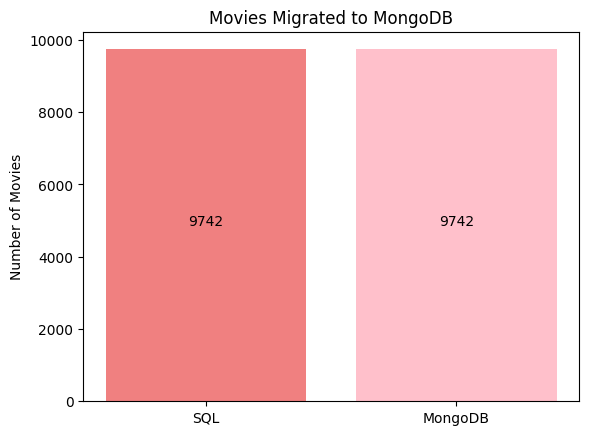

In [42]:
labels = ['SQL', 'MongoDB']
movie_value = [sql_moviecount, mongo_db_moviecount]
rating_value = [sql_ratingscount, mongo_db_ratingscount]
user_value = [sql_usercount, mongo_db_usercount]

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] // 2, y[i], ha='center')

plt.bar(labels, movie_value, color=['lightcoral', 'pink'])
add_labels(labels, movie_value)
plt.title('Movies Migrated to MongoDB')
plt.ylabel('Number of Movies')
plt.show()

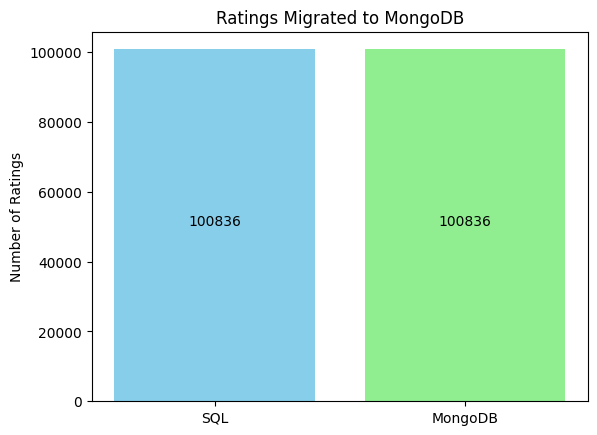

In [43]:
plt.bar(labels, rating_value, color=['skyblue', 'lightgreen'])
add_labels(labels, rating_value)
plt.title('Ratings Migrated to MongoDB')
plt.ylabel('Number of Ratings')
plt.show()

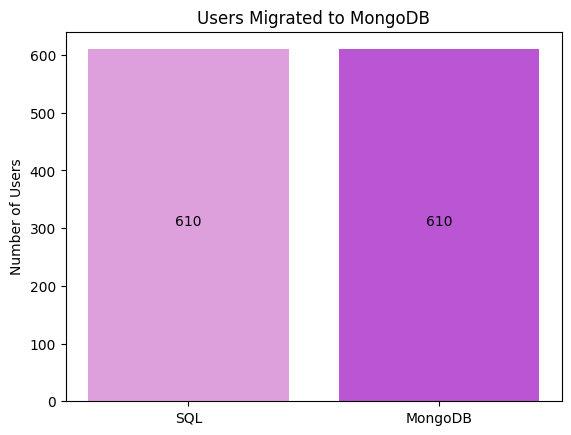

In [44]:
plt.bar(labels, user_value, color=['plum', 'mediumorchid'])
add_labels(labels, user_value)
plt.title('Users Migrated to MongoDB')
plt.ylabel('Number of Users')
plt.show()

Creating Indexes for Performance

In [45]:
# Movies indexes
db.movies.create_index('movieId', unique=True)
db.movies.create_index('genres')
db.movies.create_index([('title', 'text')])  # text search

# Ratings indexes
db.ratings.create_index([('userId', 1), ('rating_time', -1)])
db.ratings.create_index('movieId')

# Users indexes
db.users.create_index('userId', unique=True)

'userId_1'

Verification

In [46]:
movie_col=db["movies"]
indexes = movie_col.index_information()
print(indexes)

{'_id_': {'v': 2, 'key': [('_id', 1)]}, 'movieId_1': {'v': 2, 'key': [('movieId', 1)], 'unique': True}, 'genres_1': {'v': 2, 'key': [('genres', 1)]}, 'title_text': {'v': 2, 'key': [('_fts', 'text'), ('_ftsx', 1)], 'weights': SON([('title', 1)]), 'default_language': 'english', 'language_override': 'language', 'textIndexVersion': 3}}


In [47]:
movie_col=db["ratings"]
indexes = movie_col.index_information()
print(indexes)

{'_id_': {'v': 2, 'key': [('_id', 1)]}, 'userId_1_rating_time_-1': {'v': 2, 'key': [('userId', 1), ('rating_time', -1)]}, 'movieId_1': {'v': 2, 'key': [('movieId', 1)]}}


In [48]:
movie_col=db["users"]
indexes = movie_col.index_information()
print(indexes)

{'_id_': {'v': 2, 'key': [('_id', 1)]}, 'userId_1': {'v': 2, 'key': [('userId', 1)], 'unique': True}}


In [49]:
print(db.movies.find_one({'movieId': 1 }))

{'_id': ObjectId('696bb78b9ce7f7a323703269'), 'movieId': 1, 'title': 'Toy Story', 'genres': ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'], 'release_year': '1995', 'links': {'imdbId': '0114709', 'tmdbId': 862}, 'averageRating': 3.9209302325581397, 'ratingCount': 215.0, 'tags': [{'tag': 'fun', 'tagCount': 1}, {'tag': 'pixar', 'tagCount': 2}]}


In [50]:
rat_query = db.ratings.find({'userId': 1 }).limit(5)
for rat in rat_query:
    print(rat)

{'_id': ObjectId('696bb78d9ce7f7a323705918'), 'userId': 1, 'movieId': 2492, 'rating': 4.0, 'rating_time': datetime.datetime(2000, 8, 8, 12, 57, 42)}
{'_id': ObjectId('696bb78d9ce7f7a3237058ee'), 'userId': 1, 'movieId': 2012, 'rating': 4.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 39, 36)}
{'_id': ObjectId('696bb78d9ce7f7a323705917'), 'userId': 1, 'movieId': 2478, 'rating': 4.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 39, 29)}
{'_id': ObjectId('696bb78d9ce7f7a323705896'), 'userId': 1, 'movieId': 553, 'rating': 5.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 39, 13)}
{'_id': ObjectId('696bb78d9ce7f7a3237058d6'), 'userId': 1, 'movieId': 1445, 'rating': 3.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 38, 32)}


In [51]:
print(db.users.find_one({'userId': 1}))

{'_id': ObjectId('696bb7929ce7f7a32371e25b'), 'userId': 1, 'stats': {'totalRatings': 232, 'averageRating': 4.37, 'totalTags': 0}, 'recentRatings': [{'movieId': 2492, 'rating': 4.0, 'rating_time': datetime.datetime(2000, 8, 8, 12, 57, 42)}, {'movieId': 2012, 'rating': 4.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 39, 36)}, {'movieId': 2478, 'rating': 4.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 39, 29)}, {'movieId': 553, 'rating': 5.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 39, 13)}, {'movieId': 1445, 'rating': 3.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 38, 32)}, {'movieId': 157, 'rating': 5.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 38, 20)}, {'movieId': 780, 'rating': 3.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 38, 6)}, {'movieId': 1298, 'rating': 5.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 38, 6)}, {'movieId': 3053, 'rating': 5.0, 'rating_time': datetime.datetime(2000, 7, 31, 0, 38, 6)}, {'movieId': 3448, 'rating': 5.

In [52]:
client.close()